EDA - 1

About - Dataset:
The dataset provided focuses on used bikes, capturing various attributes to analyze the second-hand bike
market. This dataset helps understand factors influencing resale prices, usage patterns, and market trends for
used bikes.

Title: Bike Details Dataset
Source:

The dataset is available on Kaggle, simulating data commonly observed in real-world online bike resale
platforms.

Description:

The dataset comprises 1061 records of used bike listings. These records include details about the bike's brand
and model, selling price, kilometers driven, ownership history, and other attributes. It is particularly useful for
resale value prediction, market analysis, and understanding buyer preferences.


The dataset consists of 7 features, combining both numeric and categorical data, offering a comprehensive
view of the second-hand bike market.

Title: Bike Details Dataset

- =name: Brand and model name of the bike (Categorical, e.g., "Royal Enfield Classic 350", "Honda Dio")Z
-selling_price: Listed selling price in INR (Numeric, e.g., 175000, 45000)Z
- year: Manufacturing year of the bike (Numeric, e.g., 2019, 2015)Z
- seller_type: Seller category, either "Individual" or "Dealer" (Categorical)Z
- owner: Ownership history, e.g., "1st owner", "2nd owner" (Categorical)Z
- km_driven: Total kilometers driven (Numeric, in km, e.g., 12000, 23000)Z
- ex_showroom_price: Original showroom price in INR (Numeric, e.g., 148114.0, 89643.0, etc,.).

Questions:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("BIKE DETAILS.csv")

In [ ]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [ ]:
#1. What is the range of selling prices in the dataset?
#ans.
selling_price_range = df["selling_price"].min(), df["selling_price"].max()
print(f"Range of selling prices: {selling_price_range}")

Range of selling prices: (5000, 760000)


In [ ]:
#2. What is the median selling price for bikes in the dataset?
#ans.
median_selling_price = df["selling_price"].median()
print(f"Median selling price: {median_selling_price}")

Median selling price: 45000.0


In [ ]:
#3. What is the most common seller type?
#ans.
most_common_seller = df["seller_type"].mode()[0]
print(f"Most common seller type: {most_common_seller}")

Most common seller type: Individual


In [ ]:
#4. How many bikes have driven more than 50,000 kilometers?
#ans.
bikes_above_50k_km = (df["km_driven"] > 50000).sum()
print(f"Number of bikes driven more than 50,000 km: {bikes_above_50k_km}")

Number of bikes driven more than 50,000 km: 170


In [ ]:
#5. What is the average km_driven value for each ownership type?
#ans.
avg_km_by_ownership = df.groupby("owner")["km_driven"].mean()
print(avg_km_by_ownership)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [ ]:
#6. What proportion of bikes are from the year 2015 or older?
#ans.
print((df["year"] <= 2015).mean()* 100)

56.64467483506126


In [ ]:
#7. What is the trend of missing values across the dataset?
#ans.
print(df.isnull().mean() * 100)

name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64


In [ ]:
#8. What is the highest ex_showroom_price recorded, and for which bike?
#ans.
print(df.loc[df["ex_showroom_price"].idxmax(), ["name", "ex_showroom_price"]])

name                 Harley-Davidson Street Bob
ex_showroom_price                     1278000.0
Name: 134, dtype: object


In [ ]:
#9. What is the total number of bikes listed by each seller type?
#ans.
print(df["seller_type"].value_counts())

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


<Axes: xlabel='km_driven', ylabel='selling_price'>

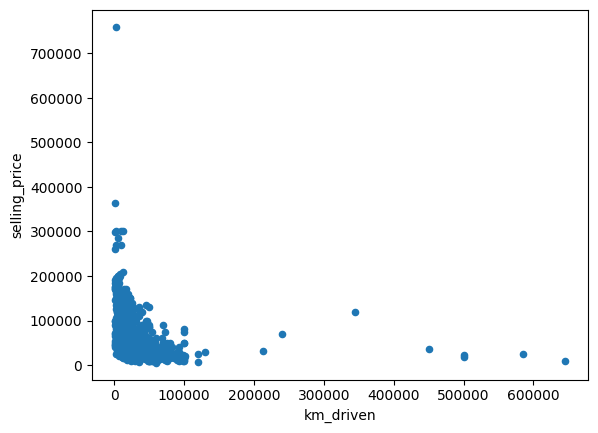

In [ ]:
#10. What is the relationship between selling_price and km_driven for first-owner bikes?
#ans.
df[df["owner"] == "1st owner"][["km_driven", "selling_price"]].plot.scatter(x="km_driven", y="selling_price")

In [ ]:
#11. Identify and remove outliers in the km_driven column using the IQR method.
#ans.
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1

filtered_df = df[(df["km_driven"] >= (Q1 - 1.5 * IQR)) & (df["km_driven"] <= (Q3 + 1.5 * IQR))]

print(f"Original dataset size: {len(df)}")
print(f"New dataset size after removing outliers: {len(filtered_df)}")

Original dataset size: 1022
New dataset size after removing outliers: 1015


<Axes: xlabel='year', ylabel='selling_price'>

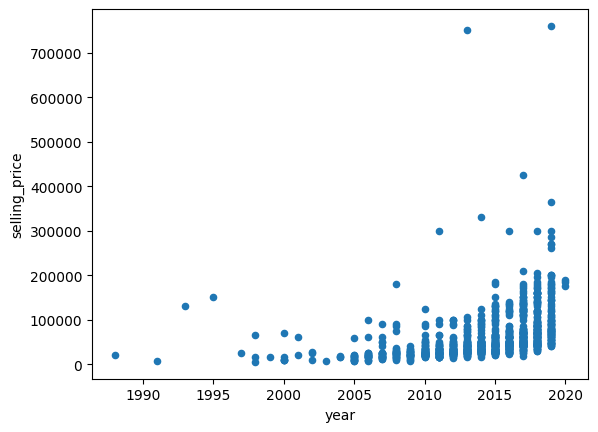

In [ ]:
#12. Perform a bivariate analysis to visualize the relationship between year and selling_price.
#ans.
df.plot.scatter(x = "year", y = "selling_price")

In [ ]:
#13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
#ans.
current_year = 2025
df["bike_age"] = current_year - df["year"]

avg_depreciation = df.groupby("bike_age")["selling_price"].mean()
print(avg_depreciation)

bike_age
5     183333.333333
6     119689.511628
7      87660.374046
8      78962.121212
9      57924.126214
10     56313.131313
11     49121.348315
12     51802.816901
13     36157.560606
14     35931.017241
15     32350.877193
16     22934.782609
17     36404.000000
18     27768.181818
19     23821.052632
20     16978.571429
21     16000.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     25000.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64


In [ ]:
#14. Which bike names are priced significantly above the average price for their manufacturing year?
#ans.
avg_price_by_year = df.groupby("year")["selling_price"].mean()
df["above_avg"] = df["selling_price"] > df["year"].map(avg_price_by_year)

expensive_bikes = df[df["above_avg"]][["name", "year", "selling_price"]]
print(expensive_bikes)

                                      name  year  selling_price
0                Royal Enfield Classic 350  2019         175000
2      Royal Enfield Classic Gunmetal Grey  2018         150000
3        Yamaha Fazer FI V 2.0 [2016-2018]  2015          65000
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                           Yamaha YZF R3  2019         365000
...                                    ...   ...            ...
1004                  Bajaj Pulsar  NS 200  2016          60000
1005                    TVS Apache RTR 160  2014          60000
1008                    Bajaj Pulsar 220 F  2012          52000
1012                   Bajaj Pulsar NS 200  2014          50000
1023                Bajaj Avenger 220 dtsi  2012          45000

[318 rows x 3 columns]


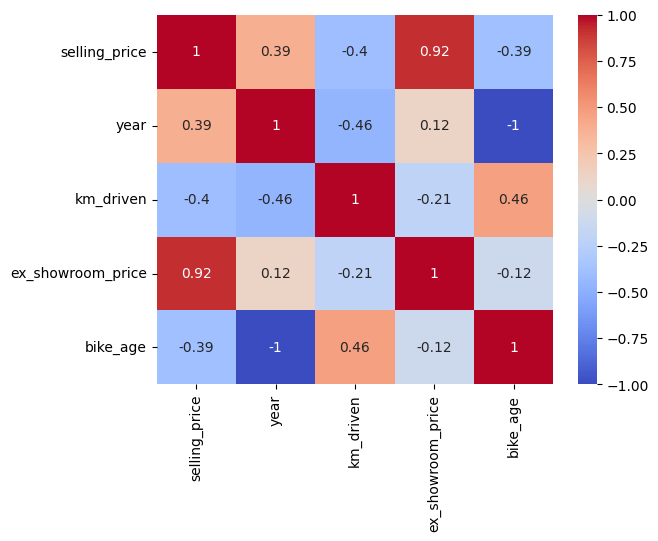

In [ ]:
#15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.
#ans.
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.select_dtypes(include=["number"]).corr()  #select only numeric columns
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

EDA - 2

About - Dataset:

The dataset provided focuses on used car sales, capturing various attributes to analyze the second-hand car
market. This dataset provides insights into factors affecting resale value, trends in the used car industry, and
consumer behavior.

Title: Car Sale Dataset

Source:

The dataset is available on Kaggle, representing data commonly seen in online car resale platforms.

Description:

The dataset contains details about used cars listed for sale, such as brand, model, selling price, kilometers
driven, fuel type, and transmission type. This information is valuable for predictive modeling, market analysis,
and understanding customer preferences.

Features:
- Car_id: A unique identifier for each car in the dataset, helping to track individual car entries.
- Date: The date when the car sale transaction took place, formatted as YYYY-MM-DD.
- Customer Name: The name of the customer who purchased the car, represented as a string.
- Gender: The gender of the customer, categorized as "Male" or "Female.
- Annual Income: The customer's annual income in US dollars, represented as a numeric value.
- Dealer_Name: The name of the dealership selling the car, represented as a string.
- Company: The manufacturer or brand name of the car, such as "Toyota," "Ford," etc.
- Model: The specific model name of the car, such as "Corolla," "Civic," etc.
- Engine: The engine type of the car, such as "V6," "I4," etc.
- Transmission: The type of transmission in the car, either "Manual" or "Automatic.
- Color: The color of the car, represented as a string (e.g., "Red," "Blue")
- Price ($): The selling price of the car in US dollars.
- Dealer_No: A unique identifier for each car dealer in the dataset.
- Body Style: The body style of the car, such as "Sedan," "SUV," etc.
- Phone: The phone number of the customer who purchased the car.
- Dealer_Region: The geographical region of the car dealer, such as "North," "South," etc.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("Car Sale.csv")

In [ ]:
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [ ]:
#1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?
#ans.
# Group by dealer and calculate the average selling price
avg_price_by_dealer = df.groupby("Dealer_Name")["Price ($)"].mean().sort_values(ascending=False)

# Display the result
print(avg_price_by_dealer)

Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.562050
Pars Auto Sales             

In [ ]:
#2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
#ans.
print(df.groupby("Company")["Price ($)"].std().idxmax())

#High price variation means the brand offers both budget and luxury models.
#Low variation suggests consistent pricing within a specific segment.

Lincoln


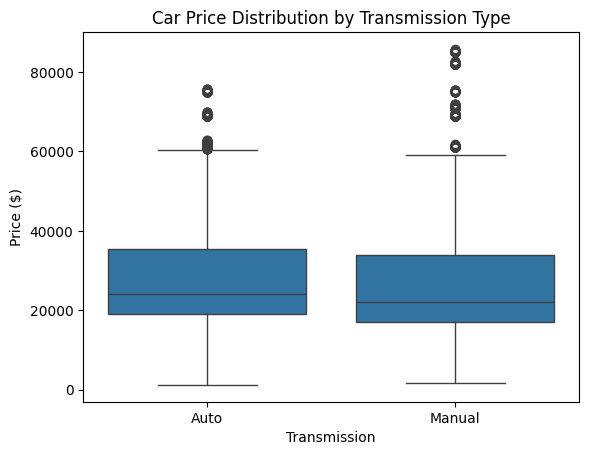

In [ ]:
#3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare.
#ans.
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x= df["Transmission"], y=df["Price ($)"])
plt.title("Car Price Distribution by Transmission Type")
plt.show()

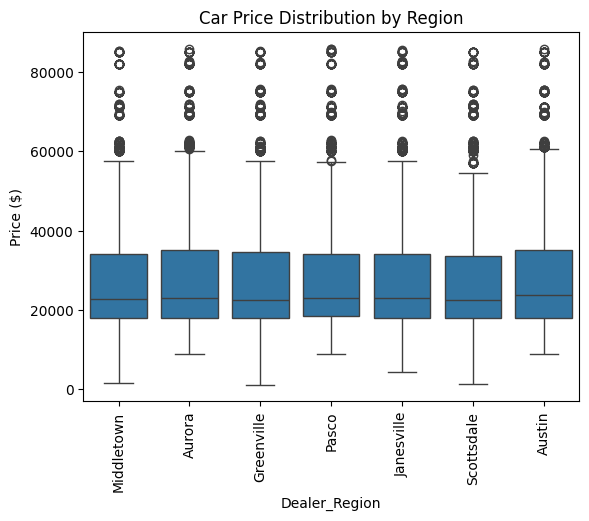

In [ ]:
#4. What is the distribution of car prices across different regions?
#ans.
# Distribution of car prices across different regions using a box plot:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["Dealer_Region"], y=df["Price ($)"])
plt.title("Car Price Distribution by Region")
plt.xticks(rotation=90)
plt.show()

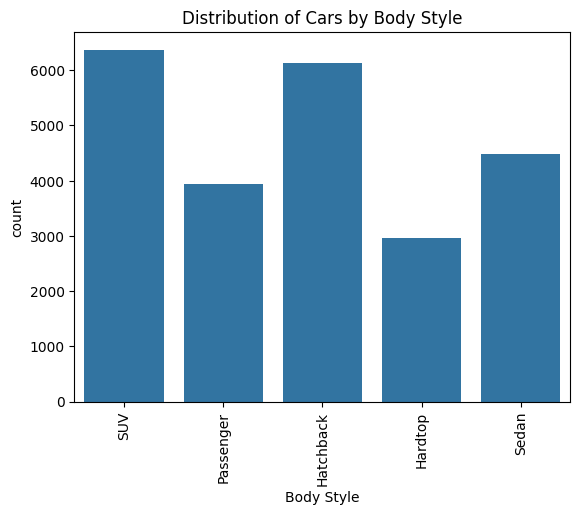

In [ ]:
#5. What is the distribution of cars based on body styles?
#ans.
# Distribution of cars based on body styles using a bar chart:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df["Body Style"])
plt.title("Distribution of Cars by Body Style")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#6. How does the average selling price of cars vary by customer gender and annual income?
#ans.
print(df.groupby("Gender")[["Price ($)", "Annual Income"]].mean())

           Price ($)  Annual Income
Gender                             
Female  28277.265270  755973.021339
Male    28039.429407  851184.044207


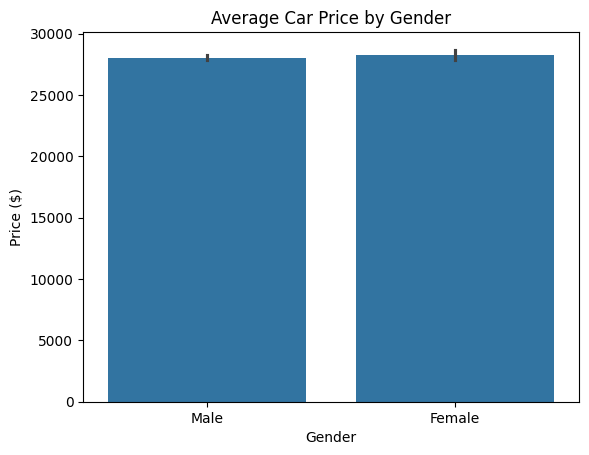

In [ ]:
# For visual comparison
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="Gender", y="Price ($)", data=df)
plt.title("Average Car Price by Gender")
plt.show()

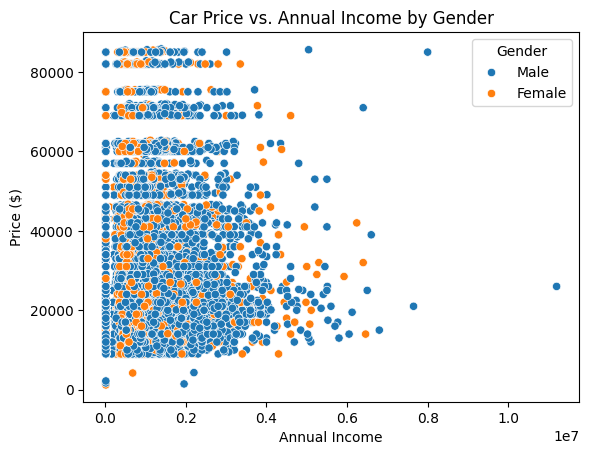

In [ ]:
# To check the relationship with annual income, use a scatter plot:
sns.scatterplot(x="Annual Income", y="Price ($)", hue="Gender", data=df)
plt.title("Car Price vs. Annual Income by Gender")
plt.show()

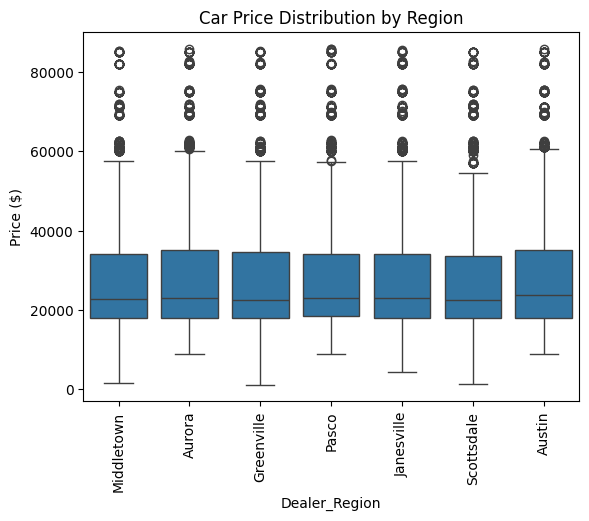

In [ ]:
#7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?
#ans.
# Car Price Distribution by Region(Box Plot)
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["Dealer_Region"], y=df["Price ($)"])
plt.title("Car Price Distribution by Region")
plt.xticks(rotation=90)  # Rotate labels if needed
plt.show()

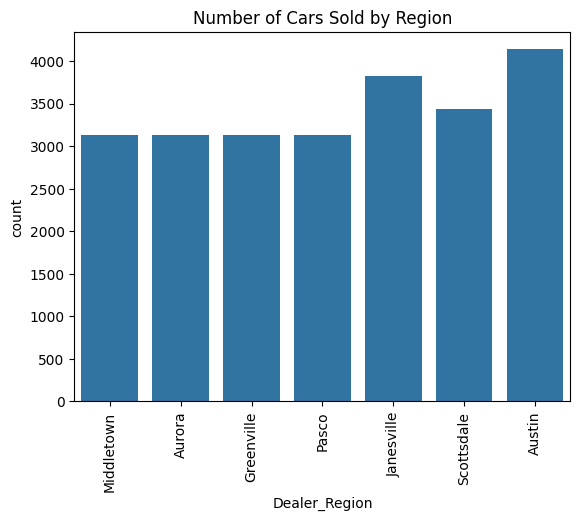

In [ ]:
# Number of Cars Sold by Region(Bar Chart)
sns.countplot(x=df["Dealer_Region"])
plt.title("Number of Cars Sold by Region")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#8. How does the average car price differ between cars with different engine sizes?
#ans.
print(df.groupby("Engine")["Price ($)"].mean())

Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


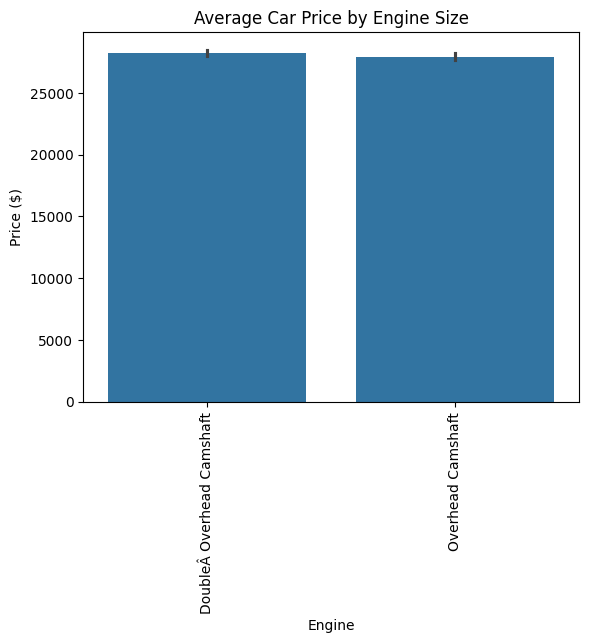

In [ ]:
# For a visual comaprison, use a bar chart:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="Engine", y="Price ($)", data=df)
plt.title("Average Car Price by Engine Size")
plt.xticks(rotation=90)  # Rotate labels if needed
plt.show()

In [ ]:
#9. How do car prices vary based on the customer’s annual income bracket?
#ans.
df["Income Bracket"] = pd.qcut(df["Annual Income"], q=4, labels=["Low", "Medium", "High", "Very High"])
print(df.groupby("Income Bracket")["Price ($)"].mean())

Income Bracket
Low          27954.276468
Medium       27974.380371
High         28288.664936
Very High    28144.058223
Name: Price ($), dtype: float64


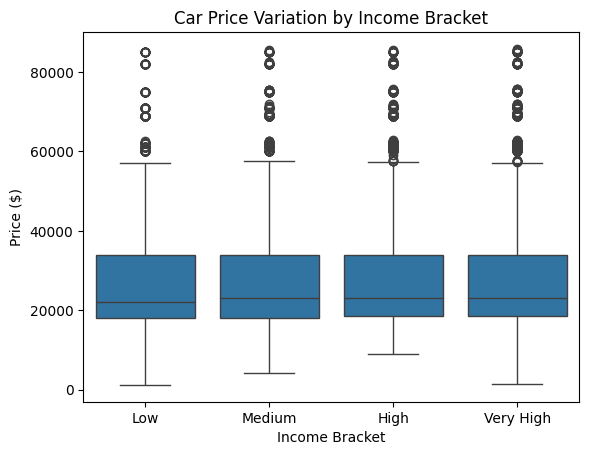

In [ ]:
# Visualizing with a Box Plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Income Bracket", y="Price ($)", data=df)
plt.title("Car Price Variation by Income Bracket")
plt.show()

In [ ]:
#10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?
#ans.
top_models = df["Model"].value_counts().head(5)
print(top_models)

Model
Diamante      418
Silhouette    411
Prizm         411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


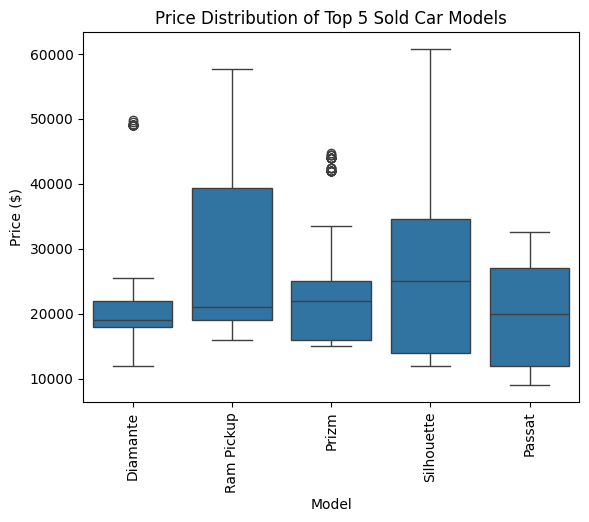

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top_models_list = top_models.index
filtered_df = df[df["Model"].isin(top_models_list)]

sns.boxplot(x="Model", y="Price ($)", data=filtered_df)
plt.title("Price Distribution of Top 5 Sold Car Models")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?
#ans.
print(df.groupby("Color")["Price ($)"].std().sort_values(ascending=False))

Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


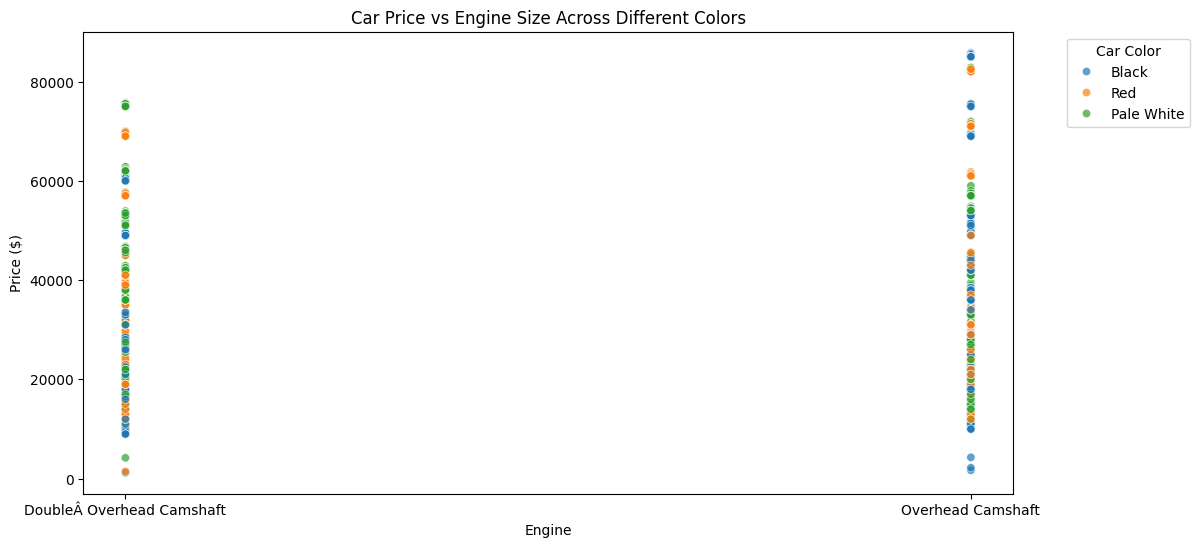

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.scatterplot(x="Engine", y="Price ($)", hue="Color", data=df, alpha=0.7)
plt.title("Car Price vs Engine Size Across Different Colors")
plt.legend(title="Car Color", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
#12. Is there any seasonal trend in car sales based on the date of sale?
#ans.
#To analyze seasonal trends in car sales, we can extract the month from the sale date and check the number of cars sold per month.
#1. Extract Month and Count Sales
df["Date"] = pd.to_datetime(df["Date"])  # Convert to datetime
df["Month"] = df["Date"].dt.month  # Extract month

monthly_sales = df["Month"].value_counts().sort_index()
print(monthly_sales)

Month
1      790
2      735
3     1535
4     1655
5     1895
6     1715
7     1725
8     1705
9     3305
10    1830
11    3470
12    3546
Name: count, dtype: int64


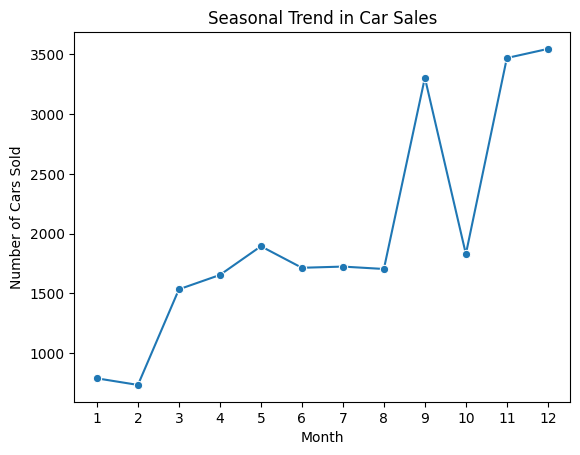

In [ ]:
#2. Visualize Seasonal Trends
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o")
plt.xticks(range(1, 13))
plt.xlabel("Month")
plt.ylabel("Number of Cars Sold")
plt.title("Seasonal Trend in Car Sales")
plt.show()

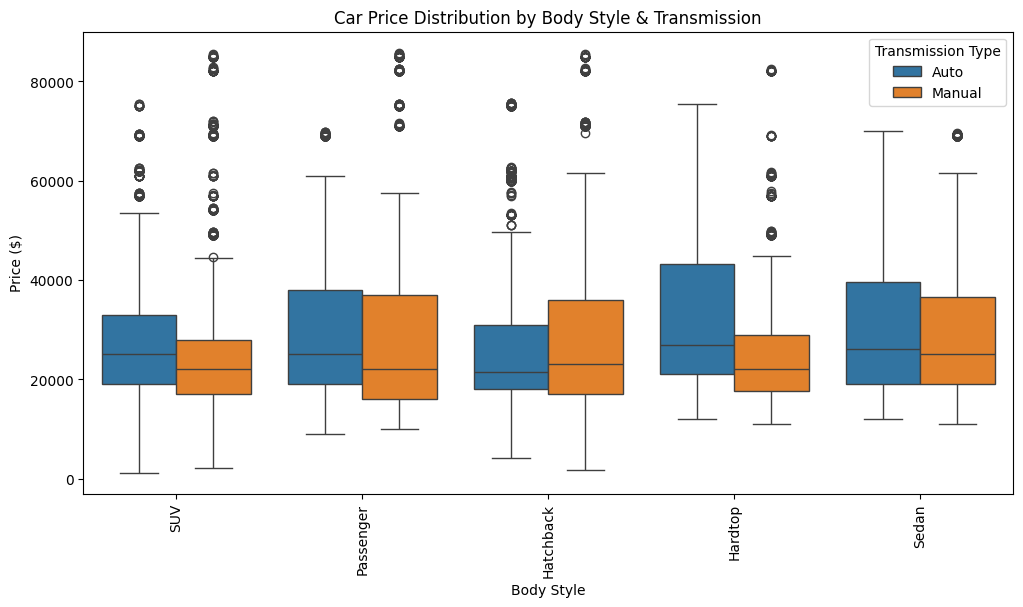

In [ ]:
#13. How does the car price distribution change when considering different combinations of body style and transmission type?
#ans.
# Box Plot for Price Distribution by Body Style & Transmission
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x="Body Style", y="Price ($)", hue="Transmission", data=df)
plt.title("Car Price Distribution by Body Style & Transmission")
plt.xticks(rotation=90)
plt.legend(title="Transmission Type")
plt.show()

#We can compare price variations within each body style.
#See if manual or automatic transmissions lead to higher prices in different body styles.
#This will help spot trends in pricing based on vehicle type & transmission choice.

In [ ]:
#14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
#ans.
#1.Convert Engine to Numeric (Extract CC Values)
df["Engine"] = df["Engine"].str.extract("(\d+)").astype(float)
df["Price ($)"] = pd.to_numeric(df["Price ($)"], errors="coerce")
df["Annual Income"] = pd.to_numeric(df["Annual Income"], errors="coerce")

In [ ]:
#2.Compute Correlation Matrix
correlation_matrix = df[["Price ($)", "Engine", "Annual Income"]].corr()
print(correlation_matrix)

               Price ($)  Engine  Annual Income
Price ($)       1.000000     NaN       0.012065
Engine               NaN     NaN            NaN
Annual Income   0.012065     NaN       1.000000


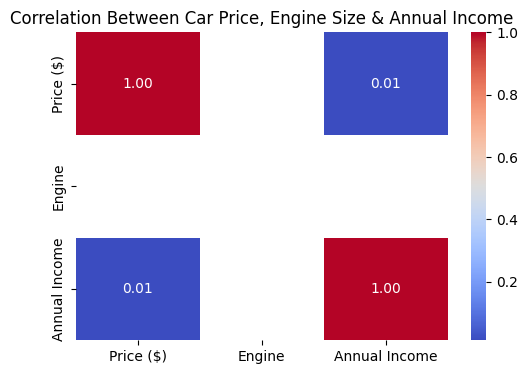

In [ ]:
#3.Visualize Correlation Using a Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Car Price, Engine Size & Annual Income")
plt.show()

In [ ]:
#15. How does the average car price vary across different car models and engine types?
#ans.
#1.Extract Numeric Engine Size (Fix Non-Numeric Issues)
import pandas as pd

# Extract numeric engine values (e.g., '1498 CC' -> 1498)
df["Engine"] = df["Engine"].astype(str).str.extract("(\d+)").astype(float)

# Ensure 'Price ($)' is numeric
df["Price ($)"] = pd.to_numeric(df["Price ($)"], errors="coerce")

In [ ]:
#2.Calculate Average Price by Model & Engine Type
avg_price = df.groupby(["Model", "Engine"])["Price ($)"].mean().reset_index()
print(avg_price)

Empty DataFrame
Columns: [Model, Engine, Price ($)]
Index: []


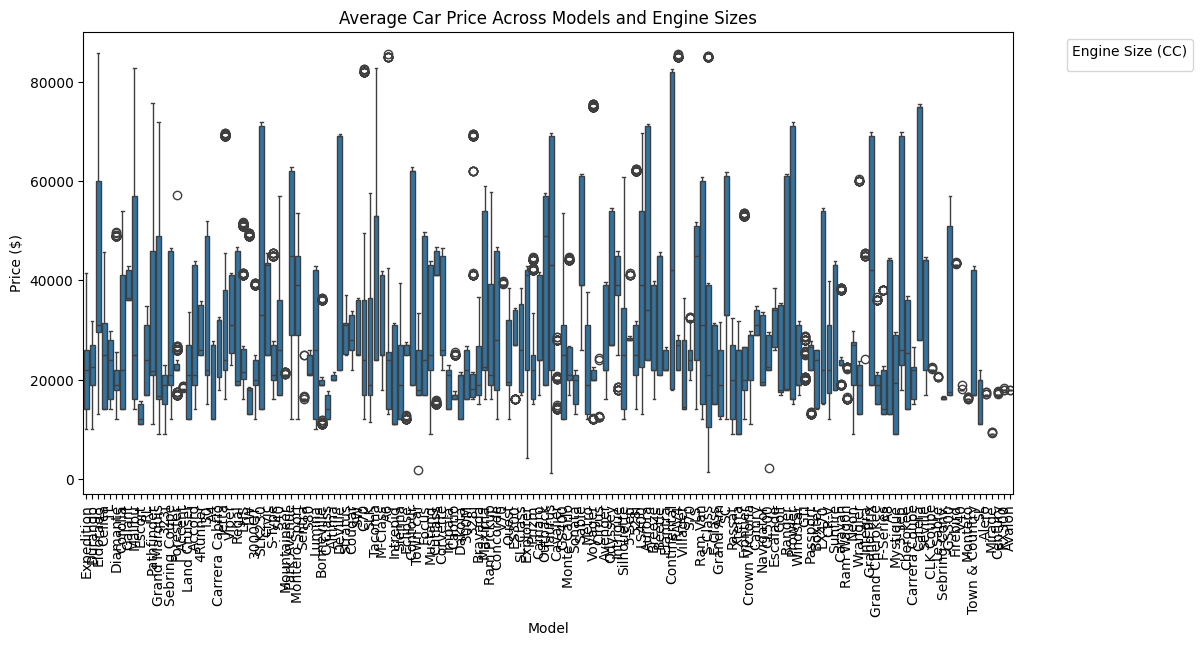

In [ ]:
#3.Visualize the Variation in Car Prices
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x="Model", y="Price ($)", data=df)
plt.xticks(rotation=90)
plt.title("Average Car Price Across Models and Engine Sizes")
plt.legend(title="Engine Size (CC)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

EDA - 3
Amazon Sales Data

Description:

This dataset contains information on 1K+ Amazon products, including their ratings, reviews, and other details.

Features:

product_id: Unique identifier for each product

product_name: Name of the product

category: Category of the product

discounted_price: Discounted price of the product

actual_price: Actual price of the product

discount_percentage: Percentage of discount for the product

rating: Rating of the product (1-5)

rating_count: Number of people who voted for the Amazon rating

about_product: Description about the product

user_id: ID of the user who wrote the review

user_name: Name of the user who wrote the review

review_id: ID of the user review

review_title: Short review

review_content: Long review

img_link: Image link of the product

product_link: Official website link of the product

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("amazon.csv")

In [ ]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
#1. What is the average rating for each product category?
#ans.
# Ensure 'rating' is numeric and drop invalid values
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

# Calculate average rating per category
print(df.groupby("category")["rating"].mean().dropna())

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSu

In [ ]:
#2. What are the top rating_count products by category?
#ans.
df["rating_count"] = pd.to_numeric(df["rating_count"], errors="coerce")
df = df.dropna(subset=["rating_count"])  # Drop rows where rating_count is NaN
print(df.loc[df.groupby("category")["rating_count"].idxmax(), ["category", "product_name", "rating_count"]])

                                               category  \
900   Computers&Accessories|Accessories&Peripherals|...   
32    Computers&Accessories|Accessories&Peripherals|...   
743   Computers&Accessories|Accessories&Peripherals|...   
653   Computers&Accessories|Accessories&Peripherals|...   
940   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...   
1317  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...   
1424  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...   
808   OfficeProducts|OfficePaperProducts|Paper|Copy&...   
950   OfficeProducts|OfficePaperProducts|Paper|Stati...   

                                           product_name  rating_count  
900   Lapster USB 3.0 sata Cable for 2.5 inch SSD an...         817.0  
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0  
743   Amazon Basics Magic Slate 8.5-inch LCD Writing...         401.0  
653

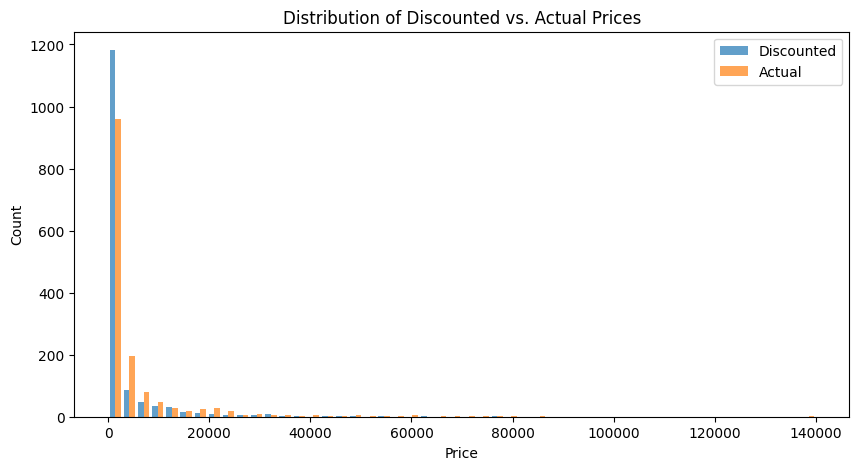

In [ ]:
#3. What is the distribution of discounted prices vs. actual prices?
#ans.
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("amazon.csv")

# Convert prices to numeric, removing non-numeric characters (e.g., ₹, commas)
df["discounted_price"] = df["discounted_price"].astype(str).str.replace(r"[^\d.]", "", regex=True)
df["actual_price"] = df["actual_price"].astype(str).str.replace(r"[^\d.]", "", regex=True)

df[["discounted_price", "actual_price"]] = df[["discounted_price", "actual_price"]].apply(pd.to_numeric, errors="coerce")

# Drop NaN values
df = df.dropna(subset=["discounted_price", "actual_price"])

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist([df["discounted_price"], df["actual_price"]], bins=50, label=["Discounted", "Actual"], alpha=0.7)
plt.xlabel("Price")
plt.ylabel("Count")
plt.legend()
plt.title("Distribution of Discounted vs. Actual Prices")
plt.show()

In [ ]:
#4. How does the average discount percentage vary across categories?
#ans.
import pandas as pd

# Load the dataset
file_path = "amazon.csv"
df = pd.read_csv(file_path)

# Convert discount percentage to numeric
df["discount_percentage"] = df["discount_percentage"].str.replace("%", "").astype(float)

# Extract the primary category
df["primary_category"] = df["category"].str.split("|").str[0]

# Compute average discount percentage by category
avg_discount = df.groupby("primary_category")["discount_percentage"].mean().sort_values(ascending=False)

# Display results
print(avg_discount)

primary_category
HomeImprovement          57.500000
Computers&Accessories    54.024283
Health&PersonalCare      53.000000
Electronics              50.828897
MusicalInstruments       46.000000
Car&Motorbike            42.000000
Home&Kitchen             40.120536
OfficeProducts           12.354839
Toys&Games                0.000000
Name: discount_percentage, dtype: float64


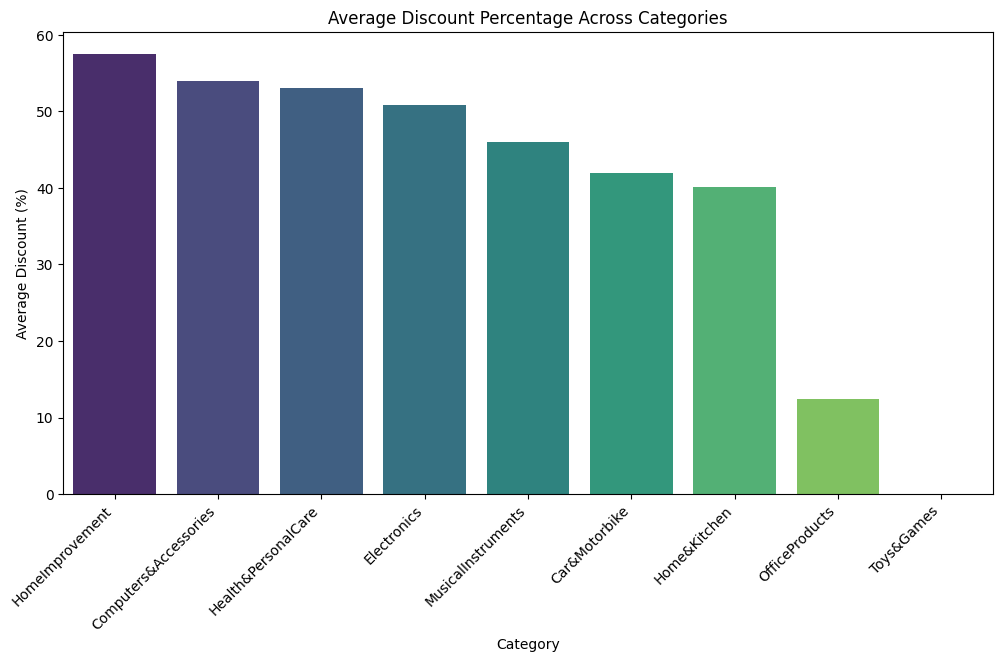

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot average discount percentage by category
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_discount.index, y=avg_discount.values, palette="viridis")

# Customize the plot
plt.xticks(rotation=45, ha="right")
plt.title("Average Discount Percentage Across Categories")
plt.xlabel("Category")
plt.ylabel("Average Discount (%)")
plt.show()

In [ ]:
#5. What are the most popular product names?
#ans.
import pandas as pd

df = pd.read_csv("amazon.csv")
df["rating_count"] =pd.to_numeric(df["rating_count"], errors="coerce")

#Get top 10 most rated products
popular_products = df.groupby("product_name")["rating_count"].sum().nlargest(10)

print(popular_products)

product_name
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                            2445.0
Zoul USB C 60W Fast Charging 3A 6ft/2M Long Type C Nylon Braided Data Cable Quick Charger Cable QC 3.0 for Samsung Galaxy M31S M30 S10 S9 S20 Plus, Note 10 9 8, A20e A40 A50 A70 (2M, Grey)          1948.0
Ambrane 2 in 1 Type-C & Micro USB Cable with 60W / 3A Fast Charging, 480 mbps High Data, PD Technology & Quick Charge 3.0, Compatible with All Type-C & Micro USB Devices (ABDC-10, Black)            1806.0
Wecool Unbreakable 3 in 1 Charging Cable with 3A Speed, Fast Charging Multi Purpose Cable 1.25 Mtr Long, Type C cable, Micro Usb Cable and Cable for iPhone, White                                    1312.0
Sounce 65W OnePlus Dash Warp Charge Cable, 6.5A Type-C to USB C PD Data Sync Fast Charging Cable Compatible with One Plus 8T/ 9/ 9R/ 9 pro/ 9RT/ 10R/ Nord & for All Ty

In [ ]:
#6. What are the most popular product keywords?
#ans.
import pandas as pd
from collections import Counter

df = pd.read_csv("amazon.csv")

# Combine all product names into one text
text = " ".join(df["product_name"].dropna()).lower()

# Split into words and count frequency
word_counts = Counter(text.split())

# Get top 10 most common words
print(word_counts.most_common(10))

[('with', 751), ('for', 672), ('|', 457), ('&', 432), ('usb', 377), ('and', 330), ('cable', 320), ('-', 220), ('charging', 219), ('to', 218)]


In [ ]:
#7. What are the most popular product reviews?
#ans.
import pandas as pd

df = pd.read_csv("amazon.csv")
df["rating_count"] = pd.to_numeric(df["rating_count"], errors="coerce")

# Get top 10 reviews based on the highest rating count
popular_reviews = df.nlargest(10, "rating_count")[["product_name", "review_title", "review_content", "rating_count"]]

print(popular_reviews)

                                           product_name  \
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...   
750        Eveready Red 1012 AAA Batteries - Pack of 10   
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...   
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
151   Zoul USB Type C Fast Charging 3A Nylon Braided...   
823   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
1272  Bajaj New Shakti Neo Plus 15 Litre 4 Star Rate...   
1259  Hindware Atlantic Xceed 5L 3kW Instant Water H...   
214   Crypo™ Universal Remote Compatible with Tata S...   
1262  iBELL Castor CTEK15L Premium 1.5 Litre Stainle...   

                                           review_title  \
1279  Decent product,doesn't pick up sand,Ok ok,Must...   
750   Nice .,very good batteries received,Longtevity...   
1059  Kettle is good but bottle is not good quality,...   
32    Great Cable, Charging Speeds Could Be Better,G...   
151   Great Cable, Charging Speeds Could Be Better,G...

In [ ]:
#8. What is the correlation between discounted_price and rating?
#ans.
print(df[["discounted_price", "rating"]].describe())
print(df[["discounted_price", "rating"]].head(10))  # Check first 10 rows

       discounted_price rating
count              1465   1465
unique              550     28
top                ₹199    4.1
freq                 53    244
  discounted_price rating
0             ₹399    4.2
1             ₹199    4.0
2             ₹199    3.9
3             ₹329    4.2
4             ₹154    4.2
5             ₹149    3.9
6          ₹176.63    4.1
7             ₹229    4.3
8             ₹499    4.2
9             ₹199    4.0


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("amazon.csv")

# Remove ₹ symbol and commas from prices
df["discounted_price"] = df["discounted_price"].astype(str).str.replace(r"[^\d.]", "", regex=True)
df["discounted_price"] = pd.to_numeric(df["discounted_price"], errors="coerce")

df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

# Drop missing values
df_cleaned = df.dropna(subset=["discounted_price", "rating"])

# Compute correlation
correlation = df_cleaned["discounted_price"].corr(df_cleaned["rating"])
print("Correlation between discounted price and rating:", correlation)

Correlation between discounted price and rating: 0.12033741712288548


In [ ]:
#9. What are the Top 5 categories based on the highest ratings?
#ans.
import pandas as pd

df = pd.read_csv("amazon.csv")
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

top_categories = df.groupby("category")["rating"].mean().dropna().nlargest(5)

print(top_categories)

category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|Components|Memory                                     4.5
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


In [ ]:
#10. Identify any potential areas for improvement or optimization based on the data analysis.
#ans.
# Areas for Improvement:
# Optimize Discounts – Avoid excessive discounts on low-rated products.
# Improve Low-Rated Categories – Identify and fix common complaints.
# Enhance Product Descriptions – Ensure clarity to reduce negative reviews.
# Encourage More Reviews – Boost credibility with incentives.
# Refine Pricing Strategy – Focus on value, not just discounts.

EDA - 4

Description of the Dataset:

The dataset titled "Spotify Data: Popular Hip-hop Artists and Tracks" provides a curated collection of
approximately 500 entries showcasing the vibrant realm of hip-hop music. These entries meticulously compile
the most celebrated hip-hop tracks and artists, reflecting their significant influence on the genre's landscape.
Each entry not only highlights the popularity and musical composition of the tracks but also underscores the
creative prowess of the artists and their profound impact on global listeners.


Application in Data Science:

This dataset serves as a valuable resource for various data science explorations. Analysts can delve into trend
analysis to discern the popularity dynamics of hit hip-hop tracks over recent years. Additionally, the dataset
enables network analysis to uncover collaborative patterns among top artists, shedding light on the genre's
evolving collaborative landscape. Furthermore, it facilitates the development of predictive models aimed at
forecasting track popularity based on diverse features, offering insights for artists, producers, and marketers.

Column Descriptors:


Artist: The name of the artist, providing direct attribution to the creative mind behind the track.

Track Name: The title of the track, encapsulating its identity and essence.

Popularity: A numeric score reflecting the track's reception and appeal among Spotify listeners.

Duration (ms): The track's length in milliseconds, detailing the temporal extent of the musical experience.

Track ID: A unique identifier within Spotify's ecosystem, enabling direct access to the track for further
exploration.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("spotify.csv")

In [6]:
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [7]:
#1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.
#ans.
#The dataset has 440 entries and 5 columns. Here’s what I found:

#Null Values: There are no missing values in the dataset.
#Duplicate Rows: I'll check for duplicates now.

#There are 27 duplicate rows in the dataset. I will now remove them and provide an update.

In [8]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
duplicate_rows

27

In [9]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Confirm duplicates are removed
df_cleaned.duplicated().sum(), df_cleaned.shape

(0, (413, 5))

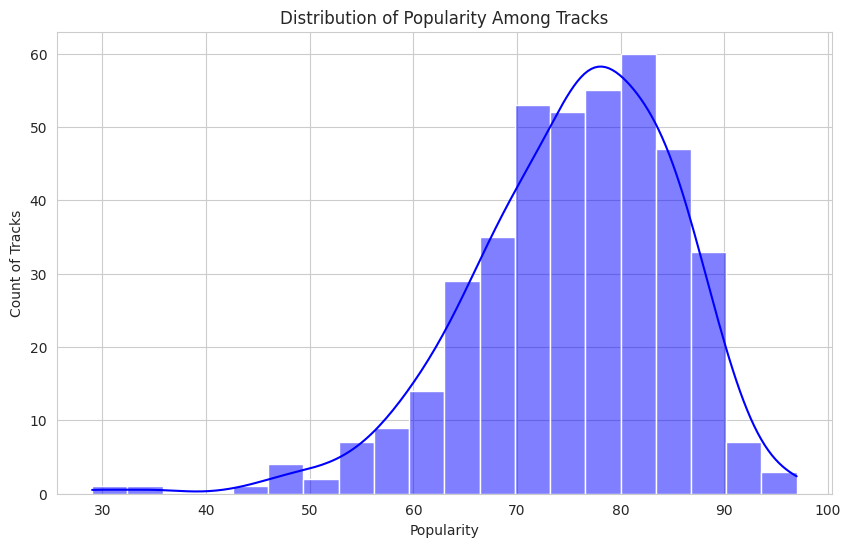

In [10]:
#2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.
#ans.
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style("whitegrid")

# Plot histogram for popularity distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned["Popularity"], bins=20, kde=True, color="blue")

# Labels and title
plt.xlabel("Popularity")
plt.ylabel("Count of Tracks")
plt.title("Distribution of Popularity Among Tracks")

# Show the plot
plt.show()

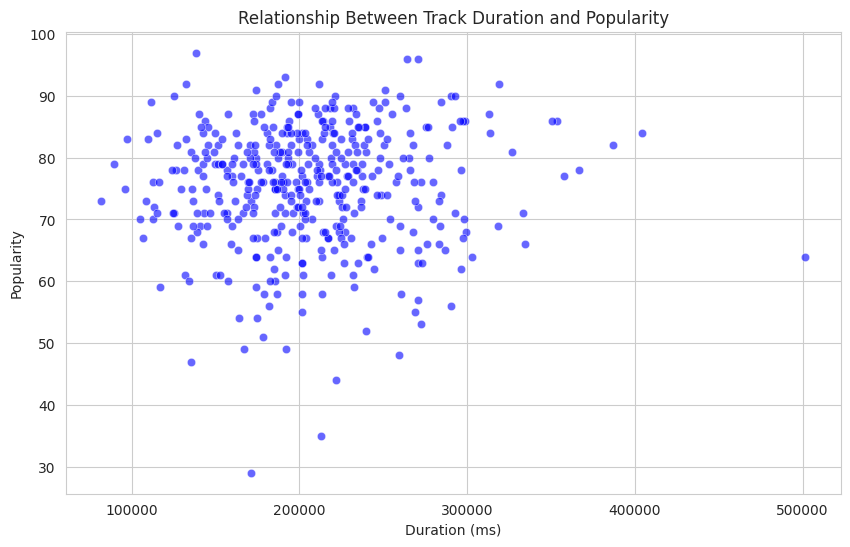

In [11]:
#3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.
#ans.
# Scatter plot of Popularity vs. Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned["Duration (ms)"], y=df_cleaned["Popularity"], alpha=0.6, color="blue")

# Labels and title
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.title("Relationship Between Track Duration and Popularity")

# Show the plot
plt.show()

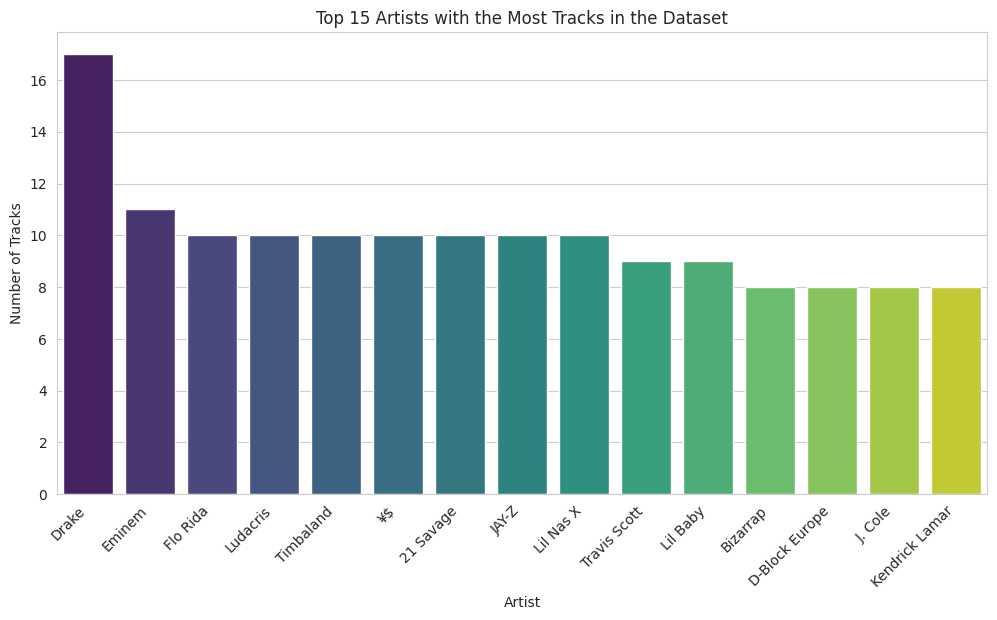

In [12]:
#4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.
#ans.
# Count the number of tracks per artist
plt.figure(figsize=(12, 6))
top_artists = df_cleaned["Artist"].value_counts().head(15)  # Show only top 15 artists

# Create a countplot
sns.barplot(x=top_artists.index, y=top_artists.values, palette="viridis")

# Labels and title
plt.xlabel("Artist")
plt.ylabel("Number of Tracks")
plt.title("Top 15 Artists with the Most Tracks in the Dataset")
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.show()

In [13]:
#5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.
#ans.
# Get the top 5 least popular tracks
least_popular_tracks = df_cleaned.nsmallest(5, "Popularity")[["Artist", "Track Name", "Popularity"]]
least_popular_tracks

,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


In [14]:
#6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.
#ans.
# Calculate the average popularity for each artist
artist_popularity = df_cleaned.groupby("Artist")["Popularity"].mean()

# Get the top 5 most frequent artists in the dataset
top_5_artists = df_cleaned["Artist"].value_counts().head(5).index

# Filter and sort by average popularity
top_5_avg_popularity = artist_popularity.loc[top_5_artists].sort_values(ascending=False)
top_5_avg_popularity

,Popularity
Artist,
Eminem,83.636364
Drake,82.882353
Flo Rida,78.000000
Timbaland,69.000000
Ludacris,63.000000


In [15]:
#7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.
#ans.
# Get the most popular track for each of the top 5 artists
top_5_most_popular_tracks = df_cleaned.loc[df_cleaned.groupby("Artist")["Popularity"].idxmax()]
top_5_most_popular_tracks = top_5_most_popular_tracks[top_5_most_popular_tracks["Artist"].isin(top_5_avg_popularity.index)][["Artist", "Track Name", "Popularity"]]

top_5_most_popular_tracks

,Artist,Track Name,Popularity
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92
80,Eminem,Without Me,90
300,Flo Rida,Low (feat. T-Pain),84
371,Ludacris,My Chick Bad,67
380,Timbaland,The Way I Are,85


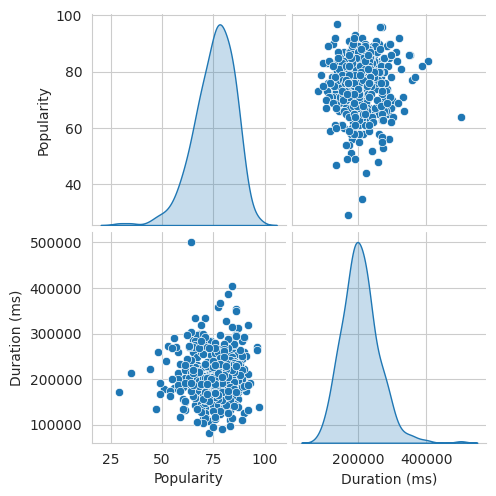

In [16]:
#8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.
#ans.
# Pair plot to visualize relationships between numerical variables
sns.pairplot(df_cleaned[["Popularity", "Duration (ms)"]], diag_kind="kde")

# Show the plot
plt.show()

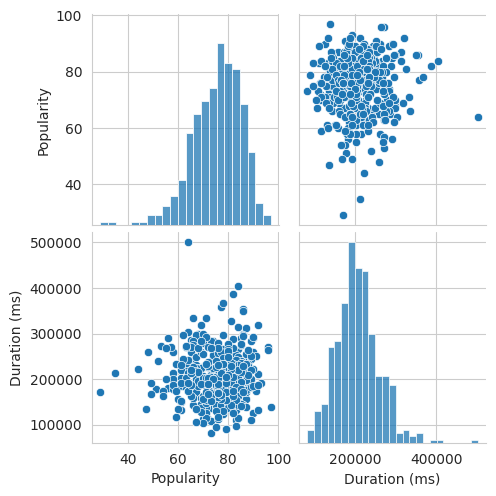

In [17]:
# Pair plot to visualize relationships between numerical variables
sns.pairplot(df_cleaned[["Popularity", "Duration (ms)"]])

# Show the plot
plt.show()

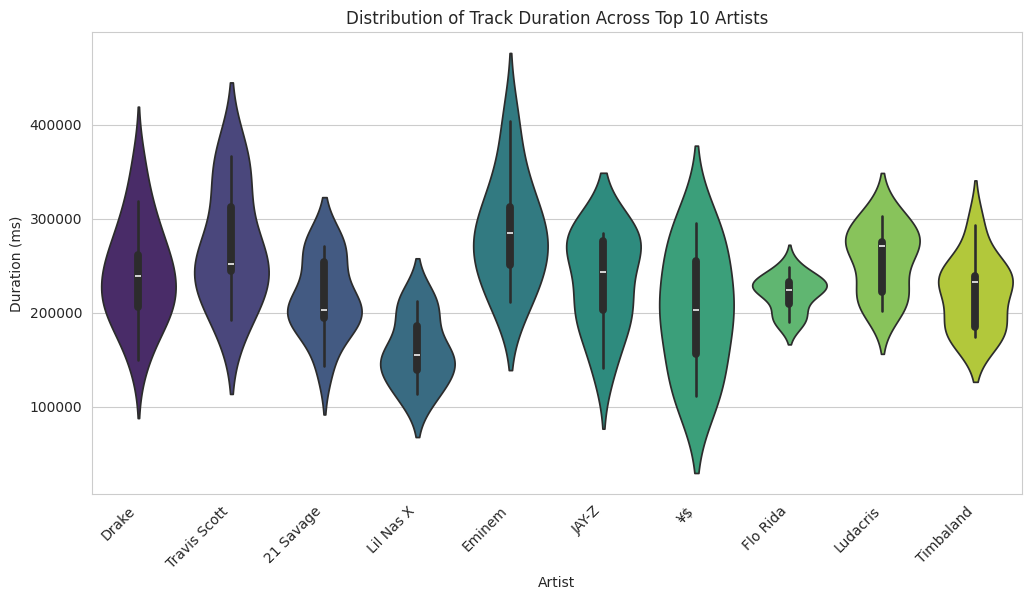

In [18]:
#9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.
#ans.
# Select top 10 artists with the most tracks
top_10_artists = df_cleaned["Artist"].value_counts().head(10).index

# Filter the dataset for these artists
df_top_artists = df_cleaned[df_cleaned["Artist"].isin(top_10_artists)]

# Create a violin plot for track duration across different artists
plt.figure(figsize=(12, 6))
sns.violinplot(x="Artist", y="Duration (ms)", data=df_top_artists, palette="viridis")

# Labels and title
plt.xlabel("Artist")
plt.ylabel("Duration (ms)")
plt.title("Distribution of Track Duration Across Top 10 Artists")
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.show()

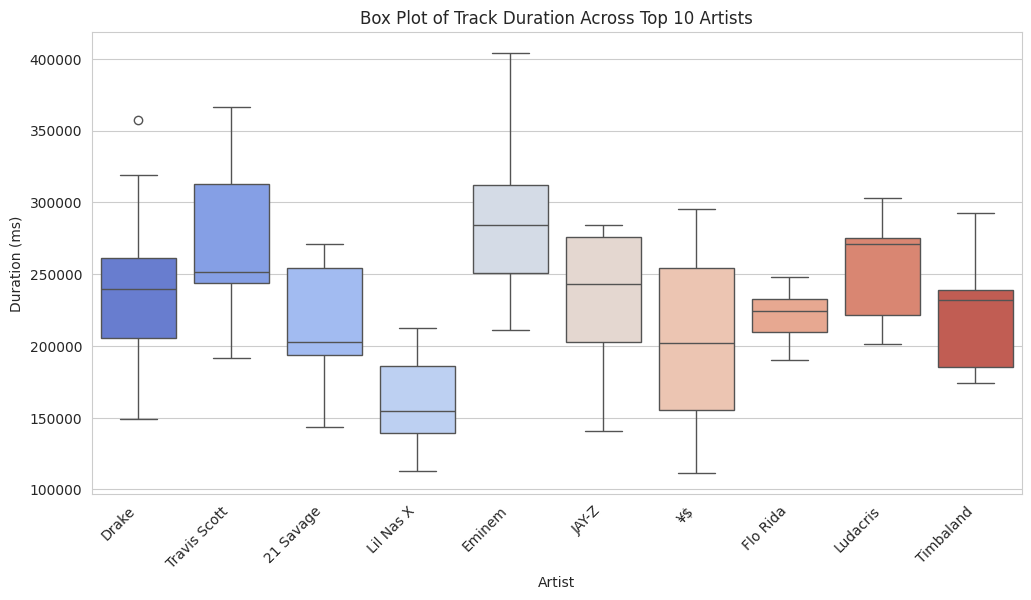

In [19]:
# Create a box plot for track duration across different artists
plt.figure(figsize=(12, 6))
sns.boxplot(x="Artist", y="Duration (ms)", data=df_top_artists, palette="coolwarm")

# Labels and title
plt.xlabel("Artist")
plt.ylabel("Duration (ms)")
plt.title("Box Plot of Track Duration Across Top 10 Artists")
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.show()

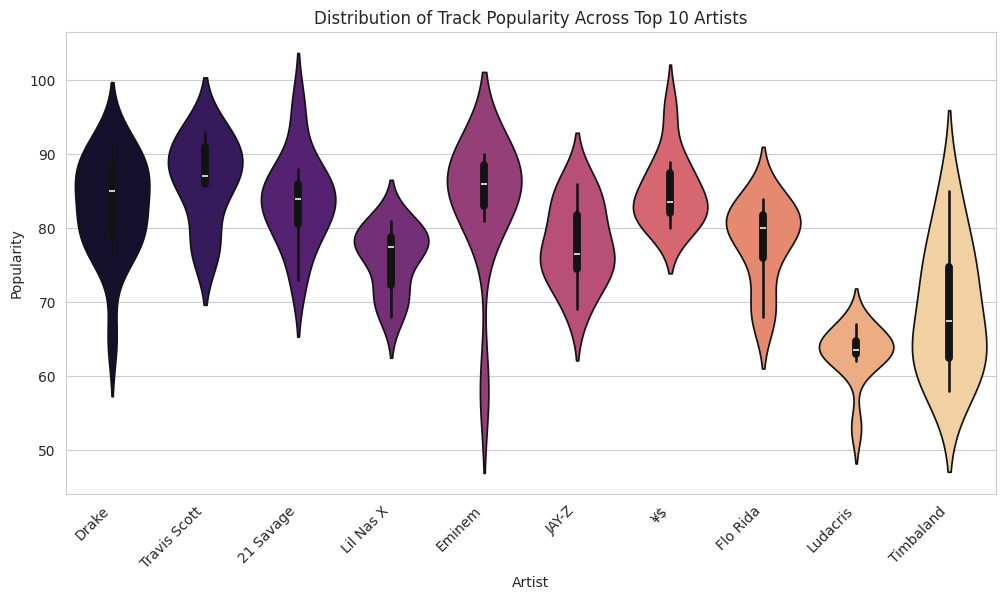

In [20]:
#10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.
#ans.
# Create a violin plot for track popularity across different artists
plt.figure(figsize=(12, 6))
sns.violinplot(x="Artist", y="Popularity", data=df_top_artists, palette="magma")

# Labels and title
plt.xlabel("Artist")
plt.ylabel("Popularity")
plt.title("Distribution of Track Popularity Across Top 10 Artists")
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.show()

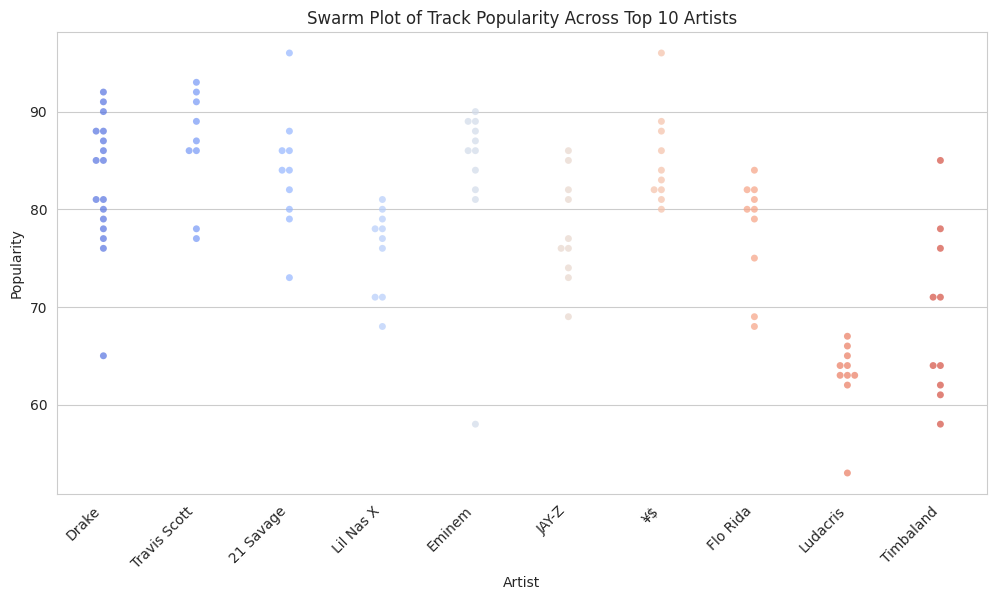

In [21]:
# Create a swarm plot for track popularity across different artists
plt.figure(figsize=(12, 6))
sns.swarmplot(x="Artist", y="Popularity", data=df_top_artists, palette="coolwarm", size=5, alpha=0.7)

# Labels and title
plt.xlabel("Artist")
plt.ylabel("Popularity")
plt.title("Swarm Plot of Track Popularity Across Top 10 Artists")
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.show()